In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [7]:
# Dataset
friedman2 = requests.get('https://www.stata-press.com/data/r12/friedman2.dta').content
data = pd.read_stata(BytesIO(friedman2))
data.index = data.time
data.index.freq = "QS-OCT"
data

,m2,time,m1,consump,pc92
time,,,,,
1946-01-01,NaN,1946-01-01,NaN,134.899994,NaN
1946-04-01,NaN,1946-04-01,NaN,140.100006,NaN
1946-07-01,NaN,1946-07-01,NaN,148.899994,NaN
1946-10-01,NaN,1946-10-01,NaN,153.199997,NaN
1947-01-01,NaN,1947-01-01,NaN,156.600006,912.099976
...,...,...,...,...,...
1997-07-01,3979.270020,1997-07-01,1063.550049,5540.299805,4947.000000
1997-10-01,4046.389893,1997-10-01,1076.040039,5593.200195,4981.000000
1998-01-01,4133.879883,1998-01-01,1081.109985,5676.500000,5055.100098


In [5]:
# Variables
endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])

In [11]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                consump   No. Observations:                   92
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -340.508
Date:                Tue, 25 May 2021   AIC                            691.015
Time:                        23:32:48   BIC                            703.624
Sample:                    01-01-1959   HQIC                           696.105
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0630     56.641     -0.637      0.524    -147.078      74.952
m2             1.1220      0.036     30.826      0.000       1.051       1.193
ar.L1          0.9348      0.041     22.717      0.0

In [12]:
# Dataset
raw = pd.read_stata(BytesIO(friedman2))
raw.index = raw.time
raw.index.freq = "QS-OCT"
data = raw.loc[:'1981']

# Variables
endog = data.loc['1959':, 'consump']
exog = sm.add_constant(data.loc['1959':, 'm2'])
nobs = endog.shape[0]

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False, maxiter=250)
print(fit_res.summary())

                               SARIMAX Results                                
Dep. Variable:                consump   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.316
Date:                Tue, 25 May 2021   AIC                            496.633
Time:                        23:33:23   BIC                            508.352
Sample:                    01-01-1959   HQIC                           501.320
                         - 01-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6765     18.490      0.037      0.971     -35.562      36.915
m2             1.0379      0.021     50.333      0.000       0.997       1.078
ar.L1          0.8775      0.059     14.858      0.0

In [13]:
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
res = mod.filter(fit_res.params)

In [14]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [15]:
# Dynamic predictions
predict_dy = res.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

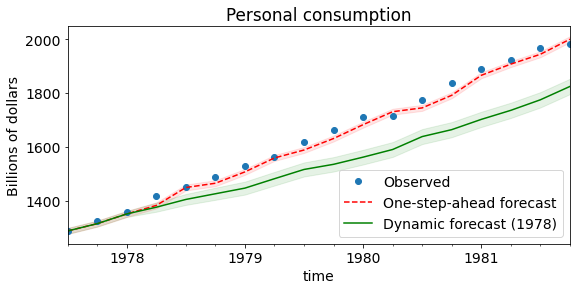

In [16]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
data.loc['1977-07-01':, 'consump'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [2]:
train = pd.read_csv('train.csv' ,parse_dates=['date'],index_col='date')#('../input/train.csv' ,parse_dates=['date'],index_col='date')
test = pd.read_csv('test.csv', parse_dates=['date'],index_col='date')#('../input/test.csv', parse_dates=['date'],index_col='date')
df = pd.concat([train,test],sort=True)
sample = pd.read_csv('sample_submission.csv')#('../input/sample_submission.csv')

In [3]:
buf = df[(df.item==1)&(df.store==1)].copy()

findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


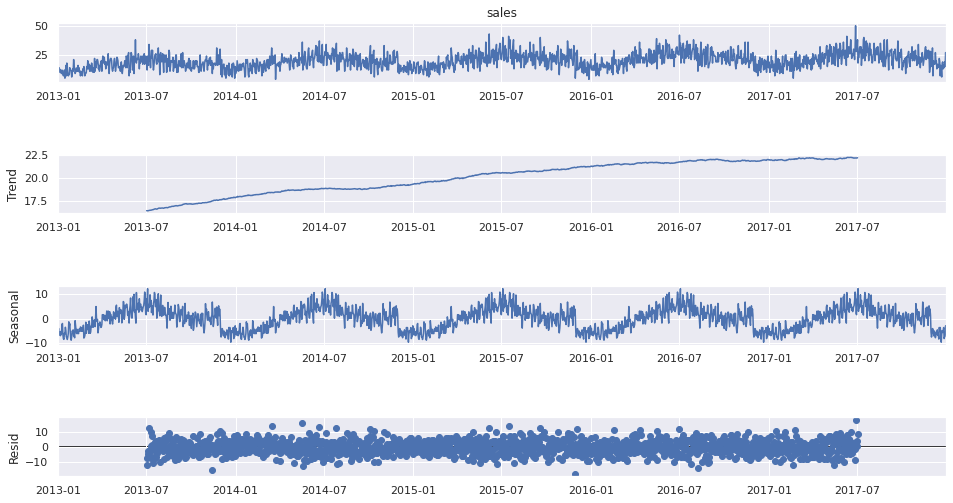

In [8]:
res = sm.tsa.seasonal_decompose(buf.sales.dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [9]:
#train_test_split
tr_start,tr_end = '2014-01-01','2017-09-30'
te_start,te_end = '2017-10-01','2017-12-31'
tra = buf['sales'][tr_start:tr_end].dropna()
tes = buf['sales'][te_start:te_end].dropna()

In [10]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(buf['sales'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.07610688992416369


In [11]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(buf['sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.2109276320434212e-23


In [12]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(buf['sales']['2015-01-01':].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.5620643402533337


In [13]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(buf['sales']['2015-01-01':].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:4.5304175615832695e-22


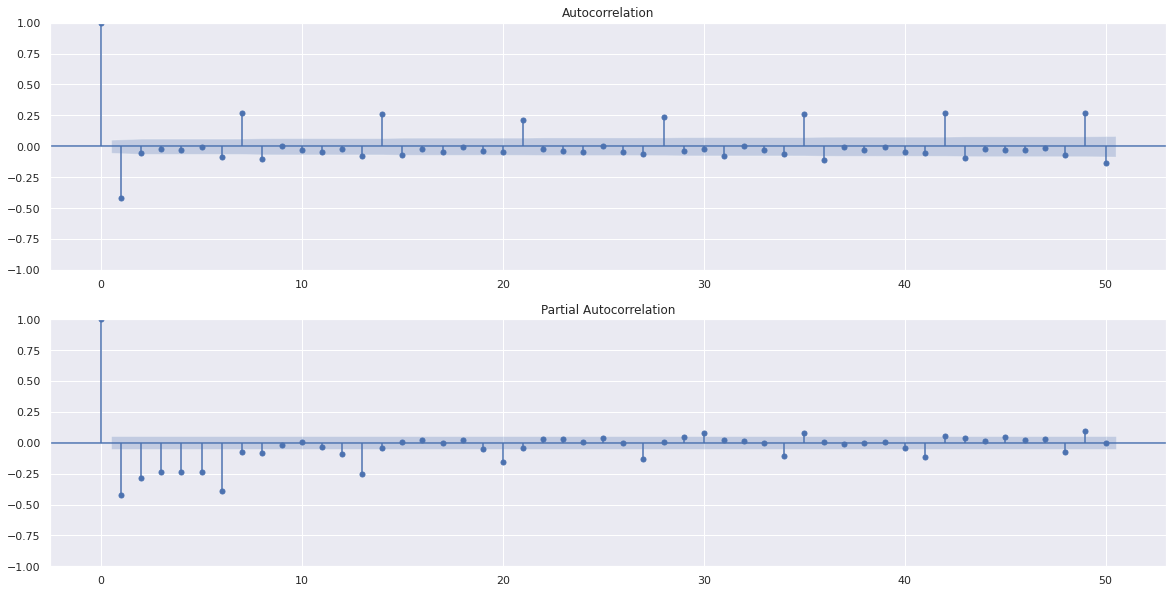

In [14]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [15]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: He

ARMA(p,q) = (7, 7) is the best.


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
tra

date
2014-01-01     9.0
2014-01-02    14.0
2014-01-03    11.0
2014-01-04    20.0
2014-01-05    17.0
              ... 
2017-09-26    18.0
2017-09-27    27.0
2017-09-28    23.0
2017-09-29    28.0
2017-09-30    30.0
Name: sales, Length: 1369, dtype: float64

In [17]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1369
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -4068.653
Date:                Fri, 11 Jun 2021   AIC                           8167.306
Time:                        00:08:46   BIC                           8245.534
Sample:                    01-01-2014   HQIC                          8196.592
                         - 09-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8970      0.036    -24.595      0.000      -0.969      -0.826
ar.L2         -0.8997      0.036    -24.795      0.000      -0.971      -0.829
ar.L3         -0.8949      0.036    -24.540      0.000      -0.966      -0.823
ar.L4         -0.8901      0.037    -24.313      0.000      -0.962      -0.818
ar.L5         -0.8957      0.035    -25.355      0.000      -0.965      -0.826
ar.L6         -0.8913      0.036    -24.631      0.000      -0.962      -0.820
ar.L7          0.0979      0.035      2.789      0.005       0.029       0.167
ma.L1          0.0485      0.022      2.163      0.031       0.005       0.093
ma.L2          0.0894      0.026      3.437      0.001       0.038       0.140
ma.L3          0.0309      0.024      1.314      0.189      -0.015       0.077
ma.L4          0.0559      0.022      2.491      0.013       0.012       0.100
ma.L5          0.1027      0.025      4.087      0.000       0.053       0.152
ma.L6          0.0802      0.022      3.704      0.000       0.038       0.123
ma.L7         -0.8548      0.024    -35.892      0.000      -0.902      -0.808
sigma2        24.7082      1.079     22.896      0.000      22.593      26.823
===================================================================================
Ljung-Box (L1) (Q):                   2.16   Jarque-Bera (JB):                10.37
Prob(Q):                              0.14   Prob(JB):                         0.01
Heteroskedasticity (H):               1.35   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

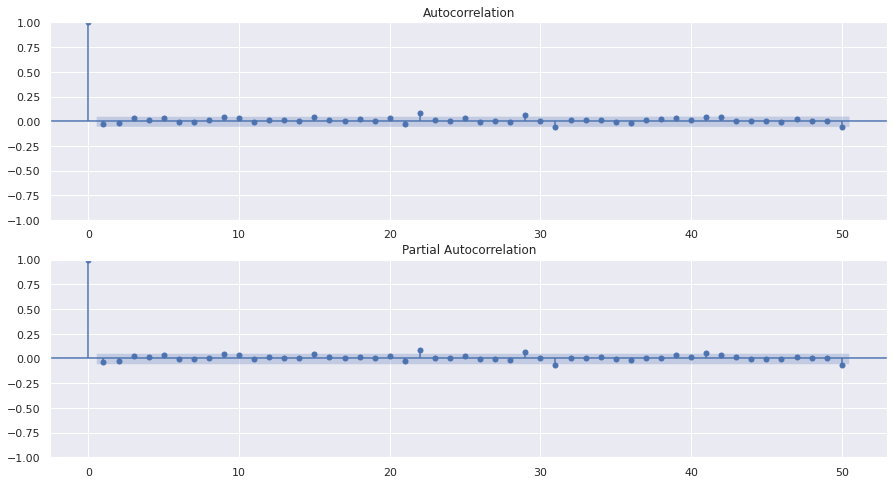

In [19]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

SARIMA model MSE:45.300625608011615


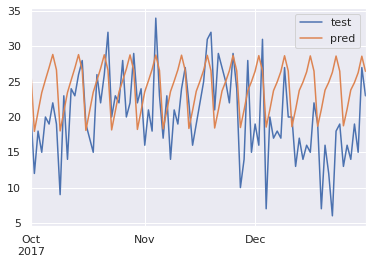

In [22]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

In [26]:
buf = df[(df.item==1)&(df.store==1)].copy()#reset buf
#month one hot encoding
buf['month'] = buf.index.month
month_dummies = pd.get_dummies(buf['month'])
month_dummies.columns = ['month-'+ str(m) for m in range(1,13)]
buf = pd.concat([buf, month_dummies], axis=1).drop(['month'],axis=1)
#dayofweek one hot encoding
buf['dayofweek'] = buf.index.weekday
week_dummies = pd.get_dummies(buf['dayofweek'])
week_dummies.columns = ['dayofweek-'+ str(w) for w in range(0,7)]
buf = pd.concat([buf, week_dummies], axis=1).drop(['dayofweek'],axis=1)
#Satday,Sunday
buf['weekend'] = (buf.index.dayofweek>4).astype(int)#Satday,Sunday

In [27]:
#shifted data
#buf['sales_shifted_91'] = buf.sales.shift(91)
buf['sales_shifted_728'] = buf.sales.shift(728)
buf['sales_shifted_364'] = buf.sales.shift(364)

In [28]:
tr_start,tr_end = '2015-01-01','2017-09-30'
te_start,te_end = '2017-10-01','2017-12-31'
tra = buf['sales'][tr_start:tr_end].dropna()
tes = buf['sales'][te_start:te_end].dropna()
exog_train = buf.drop(['id','store','item','sales'],axis = 1)[tr_start:tr_end].dropna()
exog_test = buf.drop(['id','store','item','sales'],axis = 1)[te_start:te_end].dropna()

In [32]:
tra

date
2015-01-01    11.0
2015-01-02    19.0
2015-01-03    16.0
2015-01-04    14.0
2015-01-05    14.0
              ... 
2017-09-26    18.0
2017-09-27    27.0
2017-09-28    23.0
2017-09-29    28.0
2017-09-30    30.0
Name: sales, Length: 1004, dtype: float64

In [33]:
sarimax = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),seasonal_order=(1,1,5,1),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarimax.summary()

ValueError: Seasonal periodicity must be greater than 1.